In [12]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')



You can see in below a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier(Proses Ekstraksi Fiture)


In [14]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [16]:
import glob
path_to_data = glob.glob("./dataset/Koleksi/*.jpg")
path_to_cr_data = "./dataset/Koleksi/cropped/"

In [17]:
path_to_data = "./dataset/Koleksi/"
path_to_cr_data = "./dataset/Koleksi/cropped/"

Mengambul seluruh Folder/GAmbar untuk Digunakan pada proses Cropping

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/Koleksi/cristiano_ronaldo',
 './dataset/Koleksi/leo_messi',
 './dataset/Koleksi/maria_sharapova']

Membuat Folder Baru Tempat Penyimpanan Hasil Cropping Wajah

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

Melakukan Croping Pada Objek

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dirs in img_dirs:
    count = 1
    celebrity_name = img_dirs.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dirs):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/Koleksi/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./dataset/Koleksi/cropped/leo_messi
Generating cropped images in folder:  ./dataset/Koleksi/cropped/maria_sharapova


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0, 'leo_messi': 1, 'maria_sharapova': 2}

In [34]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        #final = combined_img.reshape(1,len_image_array).astype(float)  

In [ ]:
len(X[0])

4096

In [ ]:
combined_img

array([[ 13],
       [ 17],
       [ 22],
       ...,
       [240],
       [254],
       [243]], dtype=uint8)

In [26]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(81, 4096)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=0,  test_size=0.25)


decision_tree = DecisionTreeClassifier( criterion='gini', max_depth=2, min_samples_leaf=1,splitter='best')
decision_tree = decision_tree.fit(X_train_1, y_train_1)
decision_tree.score(X_test_1, y_test_1)

0.5714285714285714

In [58]:
y_test_1

[0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2]

In [47]:
decision_tree.predict(X_test_1)

array([0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0])

Score Klasifikasi Menggunakan SVM

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.9047619047619048

In [57]:
y_test

[0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2]

In [51]:
pipe.predict(X_test)

array([0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2])

===================================Testing Image=====================================

In [94]:
img3 = cv2.imread("./static/img/maria_sharapova8.png")
scalled_raw_img3 = cv2.resize(img3, (32, 32))
img_har3 = w2d(img3,'db1',5)
scalled_img_har3 = cv2.resize(img_har3, (32, 32))
combined_img3 = np.vstack((scalled_raw_img3.reshape(32*32*3,1),scalled_img_har3.reshape(32*32,1)))


len_image_array = 32*32*3 + 32*32

final = combined_img3.reshape(1,len_image_array).astype(float)

a = img3

In [95]:
file = 'C:/Users/roni/Desktop/TA_project/dataset/Koleksi/cropped/maria_sharapova/*.png'
glob.glob(file)
images = [cv2.imread(image) for image in glob.glob(file)]

marria


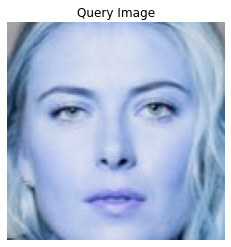

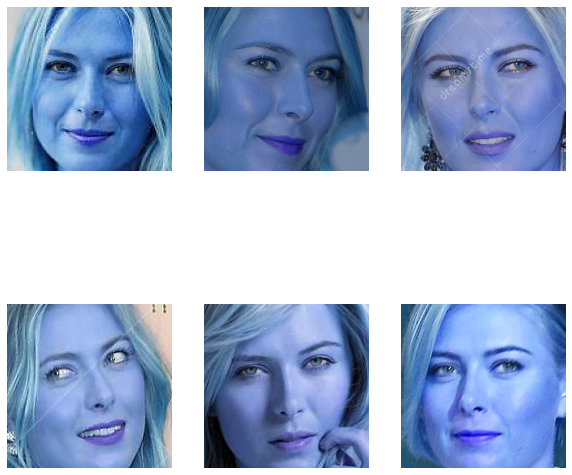

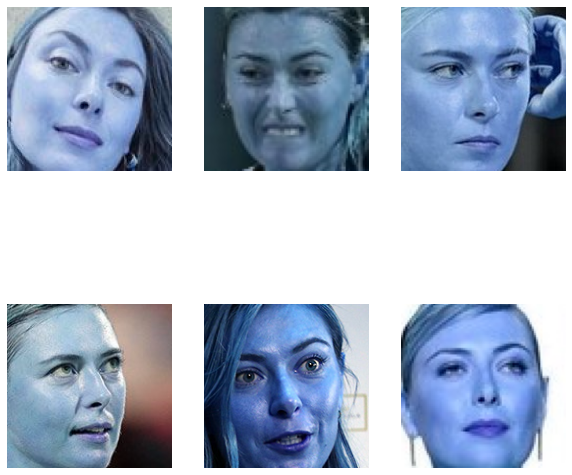

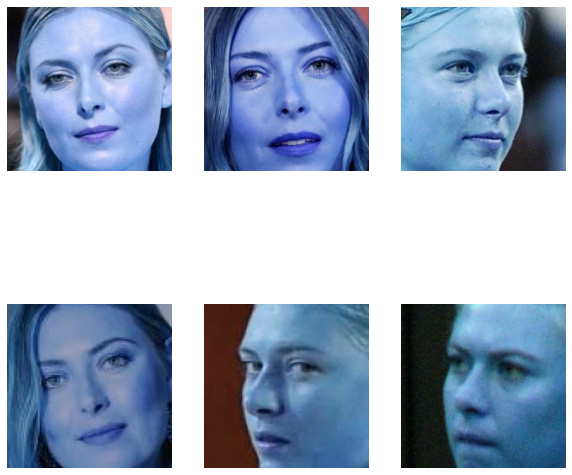

IndexError: list index out of range

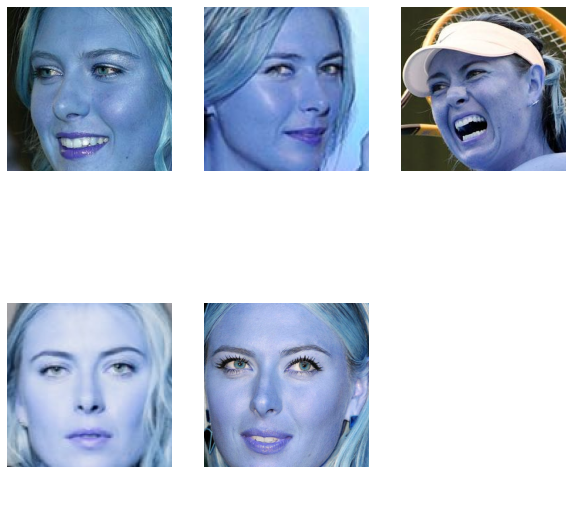

In [100]:

plt.title("Query Image")
plt.axis('off')
plt.imshow(a)
v = decision_tree.predict(final)


if v == 1 :
    print('Messi')
if v == 0 :
    print('Ronaldo')
if v == 2:
    print('marria')
    rows = 2
    cols = 3
    for i in range (0, len(images), rows*cols):
        fig = plt.figure(figsize= (10,10))
        for j in range(0, rows*cols):
            fig.add_subplot(rows, cols, j+1)
            plt.axis('off')
            plt.imshow(images[i+j])
        plt.show()

from pathlib import Path
feature_path = Path("./static/feature") / (celebrity_name + ".npy")  # e.g., ./static/feature/xxx.npy
np.save(feature_path, X)

Score Klasifikasi Menggunakan DecisionTree
